In [1]:
!pip install pyLDAvis

In [5]:
import pandas as pd
import numpy as np
import re
import string
import spacy
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [6]:
reviewData = pd.read_csv("Reviews.csv")

In [7]:
print(reviewData.head(2))
print(len(reviewData))
print('Unique Products')
print(len(reviewData.groupby('ProductId')))
print('Unique Users')
print(len(reviewData.groupby('UserId')))

   Id   ProductId          UserId ProfileName  HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW  delmartian                     1   
1   2  B00813GRG4  A1D87F6ZCVE5NK      dll pa                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
568454
Unique Products
74258
Unique Users
256059


In [21]:
def cleanText(text): 
    delDict = {special_character: '' for special_character in string.punctuation} 
    delDict[' '] = ' ' 
    table = str.maketrans(delDict)
    Text1 = text.translate(table)
    textArr= Text1.split()
    Text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))])     
    return Text2.lower()

In [22]:
import nltk
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nomz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
reviewData.dropna(axis = 0, how ='any',inplace=True) 
reviewData['Text'] = reviewData['Text'].apply(cleanText)
reviewData['Num_words_text'] = reviewData['Text'].apply(lambda x:len(str(x).split())) 

print('-------Dataset --------')
print(reviewData['Score'].value_counts())
print(len(reviewData))
print('-------------------------')
reviewDataSentenceMaxLength  = reviewData['Num_words_text'].max() 

masks = (reviewData['Num_words_text'] < 120) & (reviewData['Num_words_text'] >=15)
dfBriefReviews = reviewData[masks]
dfSampled = dfBriefReviews.groupby('Score').apply(lambda x: x.sample(n=20000)).reset_index(drop = True) 

print('No of Short reviews')
print(len(dfBriefReviews))

-------Dataset --------
5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64
568411
-------------------------
No of Short reviews
466829


In [24]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def deleteStopwords(text):
    textArray = text.split(' ')
    remainingText = " ".join([i for i in textArray if i not in stop_words])
    return remainingText

dfSampled['Text']=dfSampled['Text'].apply(deleteStopwords)

In [25]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
       return output

In [26]:
textList=dfSampled['Text'].tolist()
print(textList[1])
tokenReviews = lemmatization(textList)
print(tokenReviews[1])

worth itthe taste good either many stars ratingit worse product ever bought online everbr waste money people compare grocery stores dried cherries funny product sucks time
['worth', 'itthe', 'taste', 'good', 'many', 'star', 'ratingit', 'bad', 'product', 'online', 'everbr', 'waste', 'money', 'people', 'grocery', 'store', 'cherry', 'funny', 'product', 'time']


In [28]:
Dic = corpora.Dictionary(tokenReviews)
tdm = [Dic.doc2bow(rev) for rev in tokenReviews]

In [29]:
LDA = gensim.models.ldamodel.LdaModel

lda = LDA(corpus=tdm, id2word=Dic, num_topics=10, random_state=100,
                chunksize=100, passes=10,iterations=50)

In [ ]:
lda.print_topics()

[(0,
  '0.145*"food" + 0.039*"cat" + 0.028*"coconut" + 0.026*"brand" + 0.019*"chicken" + 0.016*"first" + 0.016*"fantastic" + 0.015*"quality" + 0.013*"month" + 0.013*"couple"'),
 (1,
  '0.051*"healthy" + 0.048*"great" + 0.044*"snack" + 0.032*"ingredient" + 0.029*"food" + 0.022*"real" + 0.021*"whole" + 0.021*"protein" + 0.020*"product" + 0.020*"health"'),
 (2,
  '0.064*"flavor" + 0.040*"taste" + 0.034*"water" + 0.032*"great" + 0.029*"good" + 0.028*"sweet" + 0.020*"strong" + 0.020*"salt" + 0.020*"sugar" + 0.017*"little"'),
 (3,
  '0.055*"treat" + 0.051*"dog" + 0.032*"problem" + 0.031*"sauce" + 0.024*"easy" + 0.022*"thank" + 0.016*"hand" + 0.014*"house" + 0.013*"find" + 0.013*"dish"'),
 (4,
  '0.054*"product" + 0.050*"great" + 0.033*"time" + 0.027*"year" + 0.023*"good" + 0.022*"love" + 0.016*"order" + 0.014*"happy" + 0.012*"month" + 0.011*"fresh"'),
 (5,
  '0.048*"good" + 0.034*"chip" + 0.025*"flavor" + 0.024*"organic" + 0.023*"delicious" + 0.021*"green" + 0.021*"tasty" + 0.019*"love" + 0.

In [30]:
pyLDAvis.enable_notebook()
visual = gensimvis.prepare(lda, tdm, Dic)
visual

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.048778 -0.116121       1        1  13.815206
9      0.166161 -0.030624       2        1  12.095331
8      0.142449  0.003553       3        1  11.960218
4      0.199365  0.052023       4        1  10.945939
0     -0.097348 -0.152050       5        1  10.931797
3     -0.123949 -0.145618       6        1  10.449915
1      0.013446 -0.105261       7        1   8.863206
6     -0.270929 -0.062678       8        1   8.087420
2      0.141821  0.204179       9        1   6.529732
5     -0.219793  0.352598      10        1   6.321237, topic_info=        Term          Freq         Total Category  logprob  loglift
99    coffee  29260.000000  29260.000000  Default  30.0000  30.0000
162     food  23756.000000  23756.000000  Default  29.0000  29.0000
168    price  15827.000000  15827.000000  Default  28.0000  28.0000
238    great  36456.000000  36456.000000  Default  27.0000  27.0000
80     water   9392.000000   9392.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
968   couple   1896.990412   2832.448478  Topic10  -4.1743   2.3604
149   choice   1327.320680   2106.021498  Topic10  -4.5315   2.2996
1081   large   1491.690333   4237.592178  Topic10  -4.4147   1.7172
53      milk   1665.784846   6442.621721  Topic10  -4.3043   1.4086
10     taste   1525.601951  19955.950967  Topic10  -4.3922   0.1901

[455 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1153     10  0.999756        able
1596      3  0.999500   afternoon
32        1  0.999527  aftertaste
568       1  0.999330     allergy
584       3  0.999519      almond
...     ...       ...         ...
123       1  0.209253        year
123       2  0.231509        year
123       4  0.522707        year
123       5  0.036410        year
882       2  0.999680       yummy

[487 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 10, 9, 5, 1, 4, 2, 7, 3, 6])

In [33]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [32]:
pyLDAvis.enable_notebook()
visual = gensimvis.prepare(lda, tdm, Dic)
visual

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.048778 -0.116121       1        1  13.811580
9      0.166161 -0.030624       2        1  12.097520
8      0.142449  0.003553       3        1  11.959943
4      0.199365  0.052023       4        1  10.946134
0     -0.097348 -0.152050       5        1  10.932878
3     -0.123949 -0.145618       6        1  10.449697
1      0.013446 -0.105261       7        1   8.862786
6     -0.270929 -0.062678       8        1   8.087578
2      0.141821  0.204179       9        1   6.529938
5     -0.219793  0.352598      10        1   6.321945, topic_info=        Term          Freq         Total Category  logprob  loglift
99    coffee  29263.000000  29263.000000  Default  30.0000  30.0000
162     food  23756.000000  23756.000000  Default  29.0000  29.0000
168    price  15827.000000  15827.000000  Default  28.0000  28.0000
238    great  36453.000000  36453.000000  Default  27.0000  27.0000
80     water   9393.000000   9393.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
968   couple   1897.202882   2832.616663  Topic10  -4.1743   2.3603
149   choice   1327.469346   2106.194743  Topic10  -4.5315   2.2995
1081   large   1491.857408   4237.733189  Topic10  -4.4147   1.7171
53      milk   1665.971421   6442.413577  Topic10  -4.3043   1.4086
10     taste   1525.772824  19953.604965  Topic10  -4.3922   0.1902

[455 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1153     10  0.999644        able
1596      3  0.998556   afternoon
32        1  0.999093  aftertaste
568       1  0.999592     allergy
584       3  0.999542      almond
...     ...       ...         ...
123       1  0.209253        year
123       2  0.231594        year
123       4  0.522707        year
123       5  0.036410        year
882       2  0.999499       yummy

[487 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 10, 9, 5, 1, 4, 2, 7, 3, 6])

In [34]:
print('\nPerplexity: ', lda.log_perplexity(tdm,total_docs=10000)) 

from gensim.models.coherencemodel import CoherenceModel
cohModelLda = CoherenceModel(model=lda, texts=tokenReviews, dictionary=Dic , coherence='c_v')
cohLda = cohModelLda.get_coherence()
print('\nCoherence Score: ', cohLda)


Perplexity:  -9.324078586077425

Coherence Score:  0.36194882036848336


In [48]:
def compute_coherence_values(Dic, corpus, texts, limit, start=2, step=3):
    cohValues = []
    modelList = []
    for numTopics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=numTopics, id2word=Dic)
        modelList.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=Dic, coherence='c_v')
        cohValues.append(coherencemodel.get_coherence())
    return modelList, cohValues

In [49]:
modelList, cohValues = compute_coherence_values(Dic=Dic, corpus=tdm, texts=tokenReviews, start=2, limit=50, step=1)

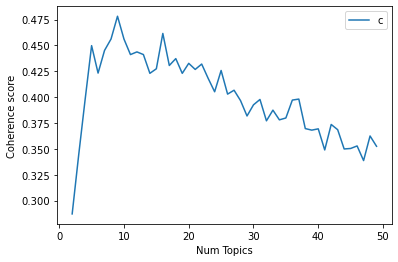

In [50]:
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, cohValues)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [51]:
for m, cohv in zip(x, cohValues):
    print("Number of Topics =", m, "and it has Coherence of", round(cohv, 4))

Number of Topics = 2 and it has Coherence of 0.2871
Number of Topics = 3 and it has Coherence of 0.3437
Number of Topics = 4 and it has Coherence of 0.3976
Number of Topics = 5 and it has Coherence of 0.4497
Number of Topics = 6 and it has Coherence of 0.4232
Number of Topics = 7 and it has Coherence of 0.4451
Number of Topics = 8 and it has Coherence of 0.4561
Number of Topics = 9 and it has Coherence of 0.4782
Number of Topics = 10 and it has Coherence of 0.4561
Number of Topics = 11 and it has Coherence of 0.4411
Number of Topics = 12 and it has Coherence of 0.4437
Number of Topics = 13 and it has Coherence of 0.4411
Number of Topics = 14 and it has Coherence of 0.423
Number of Topics = 15 and it has Coherence of 0.4274
Number of Topics = 16 and it has Coherence of 0.4615
Number of Topics = 17 and it has Coherence of 0.4306
Number of Topics = 18 and it has Coherence of 0.4372
Number of Topics = 19 and it has Coherence of 0.423
Number of Topics = 20 and it has Coherence of 0.4326
Num

In [52]:
optimalModel = modelList[7]
modelTopics = optimalModel.show_topics(formatted=False)
optimalModel.print_topics(num_words=10)

[(0,
  '0.134*"coffee" + 0.034*"flavor" + 0.031*"good" + 0.024*"strong" + 0.018*"taste" + 0.016*"blend" + 0.015*"bean" + 0.013*"great" + 0.012*"favorite" + 0.012*"vanilla"'),
 (1,
  '0.034*"butter" + 0.032*"peanut" + 0.027*"store" + 0.022*"bread" + 0.021*"candy" + 0.019*"product" + 0.017*"local" + 0.015*"good" + 0.015*"cheese" + 0.015*"pill"'),
 (2,
  '0.033*"sauce" + 0.022*"pasta" + 0.015*"soup" + 0.015*"noodle" + 0.014*"olive" + 0.014*"minute" + 0.013*"jerky" + 0.012*"tooth" + 0.011*"easy" + 0.011*"beef"'),
 (3,
  '0.039*"product" + 0.033*"time" + 0.023*"good" + 0.020*"great" + 0.016*"order" + 0.012*"year" + 0.010*"first" + 0.009*"long" + 0.009*"excellent" + 0.008*"last"'),
 (4,
  '0.042*"price" + 0.034*"store" + 0.029*"great" + 0.027*"good" + 0.020*"product" + 0.014*"small" + 0.014*"size" + 0.013*"popcorn" + 0.013*"time" + 0.013*"shipping"'),
 (5,
  '0.070*"food" + 0.022*"cereal" + 0.021*"cat" + 0.021*"ingredient" + 0.020*"good" + 0.019*"chicken" + 0.018*"rice" + 0.017*"free" + 0.01

In [53]:
pyLDAvis.enable_notebook()
visual = gensimvis.prepare(optimalModel, tdm, Dic)
visual

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.116008  0.082413       1        1  16.648382
7      0.125389  0.085979       2        1  15.625278
4     -0.004367 -0.180114       3        1  12.838038
3     -0.021965 -0.124673       4        1  12.699721
0      0.250585  0.067860       5        1  11.923377
8     -0.120752 -0.114457       6        1  10.839696
5     -0.139441  0.116464       7        1   8.433161
2     -0.193284  0.207842       8        1   5.692936
1     -0.012173 -0.141313       9        1   5.299412, topic_info=           Term          Freq         Total Category  logprob  loglift
99       coffee  31218.000000  31218.000000  Default  30.0000  30.0000
162        food  21233.000000  21233.000000  Default  29.0000  29.0000
4        flavor  30266.000000  30266.000000  Default  28.0000  28.0000
83    chocolate   9249.000000   9249.000000  Default  27.0000  27.0000
28        store  13104.000000  13104.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
168       price    632.196432  15464.123739   Topic9  -5.0969  -0.2595
702      little    544.984674  13997.662598   Topic9  -5.2453  -0.3083
1409       work    420.719020   4605.996354   Topic9  -5.5041   0.5444
312      cookie    423.041706   7290.080301   Topic9  -5.4986   0.0908
272       stuff    418.686923   6093.138919   Topic9  -5.5089   0.2598

[643 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
11873      6  0.993294  addiction
1279       1  0.998537   additive
5013       8  0.995710      agave
568        1  0.000772    allergy
568        6  0.306399    allergy
...      ...       ...        ...
713        9  0.975472      yeast
882        1  0.167636      yummy
882        2  0.706819      yummy
882        5  0.011542      yummy
882        9  0.113223      yummy

[1637 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 5, 4, 1, 9, 6, 3, 2])